# 11th Session

# Risk Preferences and Uncertainty

# 1. Expected Utility Theory

- Expected Utility Theory (EUT) introduced by John von Neumann and Oskar Morgenstern provides a framework for understanding how individuals make choices under uncertainty. Instead of evaluating risky prospects based solely on their expected monetary values, individuals evaluate them based on their expected utility.

$$ EU = \sum_{i = 1}^n P_{i} \times U(x_{i})$$

where $P_{i}$ is the probability of outcome $x_{i}$ occurring, and $U(x_{i})$ is the utility of outcome $x_{i}$.

## Axioms of Expected Utility Theory

1. **Completeness**: For any two outcomes, an individual can express a preference for one over the other or be indifferent.

2. **Transitivity**: If an individual prefers outcome A to B and B to C, then they must prefer A to C.

3. **Independence**: If an individual prefers A to B, they should also prefer a lottery that offers A with some probability and a third outcome C to a lottery that offers B with the same probability and C.

4. **Continuity**: If an individual prefers A to B and B to C, there exists a probability mix of A and C that is equally preferred to B.

### 1. Independence Axiom Implementation

In [ ]:
import numpy as np

def utility_function(x):
    """Example utility function: Concave (risk-averse)"""
    return np.sqrt(x)

def independence_axiom(preferred_A, preferred_B, prob, outcome_C):
    """Check Independence Axiom."""
    lottery_A = prob * utility_function(preferred_A) + (1 - prob) * utility_function(outcome_C)
    lottery_B = prob * utility_function(preferred_B) + (1 - prob) * utility_function(outcome_C)
    
    return lottery_A, lottery_B, lottery_A > lottery_B

# Example 
preferred_A = 100  # Outcome A
preferred_B = 50   # Outcome B
prob = 0.7         # Probability of A
outcome_C = 20     # Outcome C

lottery_A, lottery_B, result = independence_axiom(preferred_A, preferred_B, prob, outcome_C)
print(f"Lottery A Utility: {lottery_A}, Lottery B Utility: {lottery_B}, A > B: {result}")

Lottery A Utility: 8.341640786499873, Lottery B Utility: 6.291388254805707, A > B: True


### 2. Utility Function Calculation
- a function to calculate utility for various outcomes based on different utility functions:

In [ ]:
def linear_utility(x):
    """Linear utility function."""
    return x

def concave_utility(x):
    """Concave utility function (risk-averse)."""
    return np.sqrt(x)

def calculate_utilities(outcomes, utility_func):
    """Calculate utilities for given outcomes using specified utility function."""
    return [utility_func(x) for x in outcomes]

# Example
outcomes = [0, 10, 20, 30, 40, 50]
linear_utilities = calculate_utilities(outcomes, linear_utility)
concave_utilities = calculate_utilities(outcomes, concave_utility)

print("Linear Utilities:", linear_utilities)
print("Concave Utilities:", concave_utilities)

Linear Utilities: [0, 10, 20, 30, 40, 50]
Concave Utilities: [0.0, 3.1622776601683795, 4.47213595499958, 5.477225575051661, 6.324555320336759, 7.0710678118654755]


### 3. Expected Utility Calculation
- computes the expected utility given a list of outcomes and their probabilities:

In [8]:
def expected_utility(outcomes, probabilities, utility_func):
    """Calculate expected utility for given outcomes and probabilities."""
    return sum(prob * utility_func(outcome) for outcome, prob in zip(outcomes, probabilities))

# Example usage
outcomes = [50, 100, 150]
probabilities = [0.2, 0.5, 0.3]  # Probabilities must sum to 1
expected_util = expected_utility(outcomes, probabilities, concave_utility)
print("Expected Utility:", expected_util)

Expected Utility: 10.088448176547862


### 4. Visualization


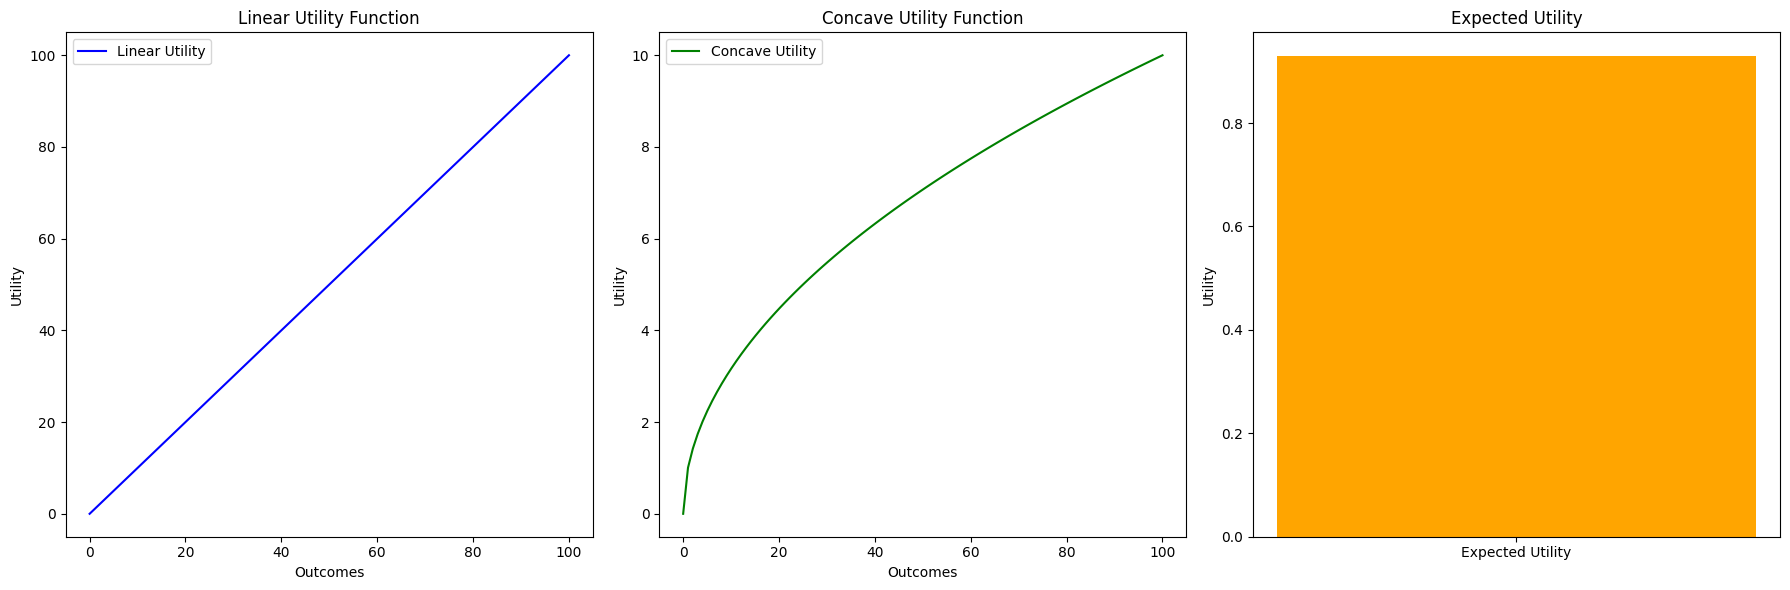

In [ ]:
import matplotlib.pyplot as plt

def plot_utilities(outcomes):
    """Plot utility functions and expected utility."""
    linear_utilities = calculate_utilities(outcomes, linear_utility)
    concave_utilities = calculate_utilities(outcomes, concave_utility)
    
    plt.figure(figsize=(18, 6))
    
    # Plot Linear Utility
    plt.subplot(1, 3, 1)
    plt.plot(outcomes, linear_utilities, label='Linear Utility', color='blue')
    plt.title('Linear Utility Function')
    plt.xlabel('Outcomes')
    plt.ylabel('Utility')
    plt.legend()
    
    # Plot Concave Utility
    plt.subplot(1, 3, 2)
    plt.plot(outcomes, concave_utilities, label='Concave Utility', color='green')
    plt.title('Concave Utility Function')
    plt.xlabel('Outcomes')
    plt.ylabel('Utility')
    plt.legend()
    
    # example
    probabilities = [0.2, 0.5, 0.3]
    expected_util = expected_utility(outcomes, probabilities, concave_utility)
    plt.subplot(1, 3, 3)
    plt.bar(['Expected Utility'], [expected_util], color='orange')
    plt.title('Expected Utility')
    plt.ylabel('Utility')
    plt.tight_layout()
    plt.show()

outcomes = np.linspace(0, 100, 100) # Outcomes from 0 to 100
plot_utilities(outcomes)


# Attitudes toward Risk

- Consider an individual choosing over prospects $(π_{1}, . . . , π_{S}; x_{1}, . . . , x_{S})$, where $x_{s} ∈ \mathbb{R}$ whose expected utility function is

$$ U^{0} (x) = \sum_{s = 1}^s π_{s} x_{s}$$

This individual is said to be **risk neutral** in that he is indifferent between
prospects that have the same expected value, even though one may be much riskier than another.



## Utility in the Machina Triangle

The Machina Triangle is a graphical representation of the utility function, where the vertices represent the three possible outcomes (0, 1, and M), and as we go up on the line, the utility increases.

Fractile Method:

The fractile method is a technique used to elicit an individual's utility function by presenting them with a series of choices between a certain outcome and a risky prospect.
The key idea is to find the probability p at which the individual is indifferent between the certain outcome and the risky prospect. This probability p is called the "certainty equivalent" and represents the utility of the risky prospect.

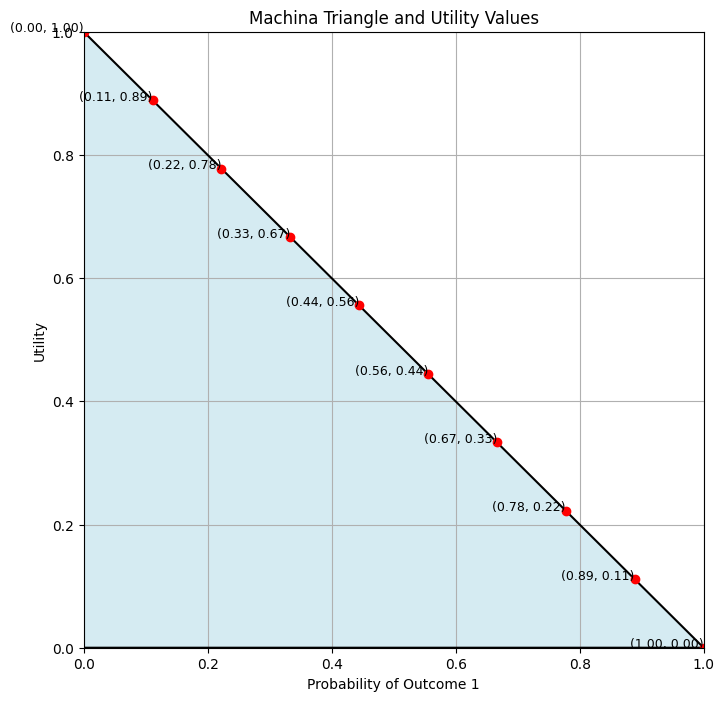

In [ ]:
def calculate_utilities(num_points=10):
    # Normalized values for M and 0
    U_0 = 0
    U_M = 1
    
    # Generate mixture probabilities
    p_values = np.linspace(0, 1, num_points)
    
    # Calculate certainty equivalents for given p_values
    utilities = []
    for p in p_values:
        U_t = (1 - p) * U_M + p * U_0
        utilities.append(U_t)
    
    return p_values, utilities

# Function to plot the Machina Triangle
def plot_machina_triangle(p_values, utilities):
    # Create the triangle vertices
    vertices = np.array([[0, 0], [1, 0], [0, 1]])
    
    plt.figure(figsize=(8, 8))
    plt.plot(*zip(*np.append(vertices, [vertices[0]], axis=0)), 'k-')
    plt.fill(vertices[:, 0], vertices[:, 1], 'lightblue', alpha=0.5)
    for p, u in zip(p_values, utilities):
        plt.plot(p, u, 'ro')  # Points for the utility values
        plt.text(p, u, f"({p:.2f}, {u:.2f})", fontsize=9, ha='right')

    plt.title('Machina Triangle and Utility Values')
    plt.xlabel('Probability of Outcome 1')
    plt.ylabel('Utility')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid()
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()

num_points = 10  # Number of points to calculate
p_values, utilities = calculate_utilities(num_points)
plot_machina_triangle(p_values, utilities)

# Bayesian Probability:

Bayesian probability is a statistical method that updates the probability of a hypothesis as new evidence or information becomes available. It contrasts with frequentist probability by incorporating prior beliefs and updating them with new data.

Hard Probabilities: These are probabilities derived from direct observation or empirical data. They are quantifiable and determined without ambiguity.

Soft Probabilities: These probabilities are based on inference and subjective judgment. They reflect uncertainty and are often used in scenarios with incomplete data.

## Example 1: Consumer Behavior Analysis

In this example, we simulate a consumer choosing between two products based on prior beliefs and new information (e.g., reviews).

Posterior Probability that Product A is better: 0.7714
Posterior Probability that Product B is better: 0.2286


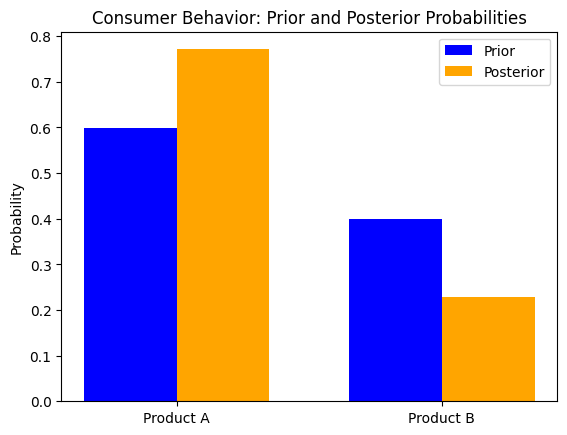

In [ ]:
# Prior probabilities for two products
P_product_A = 0.6  # Prior belief that Product A is better
P_product_B = 1 - P_product_A  # Prior belief that Product B is better

# Likelihoods based on new information (e.g., reviews)
P_positive_review_given_A = 0.9  # Likelihood of a positive review if A is better
P_positive_review_given_B = 0.4   # Likelihood of a positive review if B is better

# Total probability of a positive review
P_positive_review = (P_positive_review_given_A * P_product_A +
                     P_positive_review_given_B * P_product_B)

# Calculate posterior probabilities using Bayes' theorem
P_A_given_positive_review = (P_positive_review_given_A * P_product_A) / P_positive_review
P_B_given_positive_review = (P_positive_review_given_B * P_product_B) / P_positive_review

print(f"Posterior Probability that Product A is better: {P_A_given_positive_review:.4f}")
print(f"Posterior Probability that Product B is better: {P_B_given_positive_review:.4f}")

labels = ['Product A', 'Product B']
prior = [P_product_A, P_product_B]
posterior = [P_A_given_positive_review, P_B_given_positive_review]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, prior, width, label='Prior', color='blue')
bars2 = ax.bar(x + width/2, posterior, width, label='Posterior', color='orange')

ax.set_ylabel('Probability')
ax.set_title('Consumer Behavior: Prior and Posterior Probabilities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## Example 2: Stock Price Evaluation
In this example, we simulate a buyer updating their belief about a stock's performance based on market news.

Posterior Probability that the stock will perform well: 0.8686
Posterior Probability that the stock will perform poorly: 0.1314


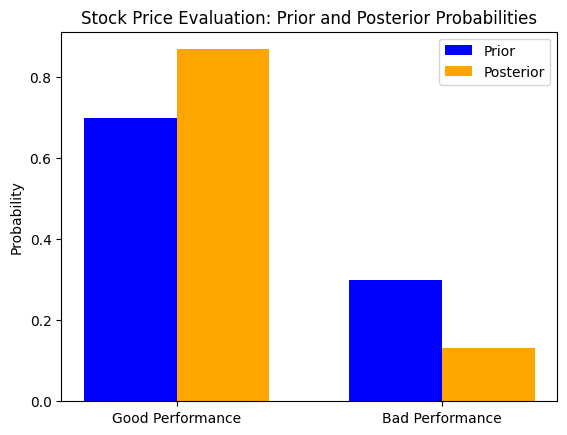

In [ ]:
P_good_performance = 0.7 
P_bad_performance = 1 - P_good_performance 

P_positive_news_given_good = 0.85 
P_positive_news_given_bad = 0.3    

P_positive_news = (P_positive_news_given_good * P_good_performance +
                   P_positive_news_given_bad * P_bad_performance)

P_good_given_positive_news = (P_positive_news_given_good * P_good_performance) / P_positive_news
P_bad_given_positive_news = (P_positive_news_given_bad * P_bad_performance) / P_positive_news

print(f"Posterior Probability that the stock will perform well: {P_good_given_positive_news:.4f}")
print(f"Posterior Probability that the stock will perform poorly: {P_bad_given_positive_news:.4f}")

labels = ['Good Performance', 'Bad Performance']
prior = [P_good_performance, P_bad_performance]
posterior = [P_good_given_positive_news, P_bad_given_positive_news]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, prior, width, label='Prior', color='blue')
bars2 = ax.bar(x + width/2, posterior, width, label='Posterior', color='orange')

ax.set_ylabel('Probability')
ax.set_title('Stock Price Evaluation: Prior and Posterior Probabilities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Interpretation

Posterior Probability that the stock will perform well: 0.8686

Posterior Probability that the stock will perform poorly: 0.1314

Posterior Probability of Good Performance (0.8686):

This value indicates that, after considering the positive news, there is an 86.86% probability that the stock will perform well.
This high probability suggests that the buyer should have a strong confidence in the stock's positive outlook, influenced by the favorable news.
Posterior Probability of Poor Performance (0.1314):

This value indicates that there is a 13.14% probability that the stock will perform poorly.
This lower probability reflects a significant decrease in the likelihood of poor performance compared to the prior belief, suggesting that the positive news has effectively reduced concerns about the stock underperforming.


Given these posterior probabilities, the buyer may decide to invest in the stock, as the updated belief strongly favors good performance. The low probability of poor performance indicates reduced risk, which could encourage investment or increased confidence in holding the stock. These probabilities can be adjusted further as new information becomes available (e.g., future news, earnings reports), allowing the buyer to continuously update their beliefs about the stock's performance.

## Example 3: Bayesian Updating in Monetary Policy

Central banks often use Bayesian methods to adjust their beliefs about the economy based on incoming data. For instance, consider a central bank that is trying to estimate the effect of interest rate changes on inflation.

Prior Belief: The central bank has a prior belief about the relationship between interest rates and inflation based on historical data, say a 70% chance that lowering interest rates will lead to higher inflation.

New Information: Suppose new economic data suggests that inflation is more responsive to interest rate changes than previously thought. The central bank receives this new information, which they interpret as evidence.

Updating Beliefs: Using Bayesian updating, the central bank adjusts its belief about the effectiveness of interest rate changes. They calculate the posterior probability that lowering interest rates will lead to higher inflation.

Posterior Probability that lowering rates is effective given new data: 0.9130


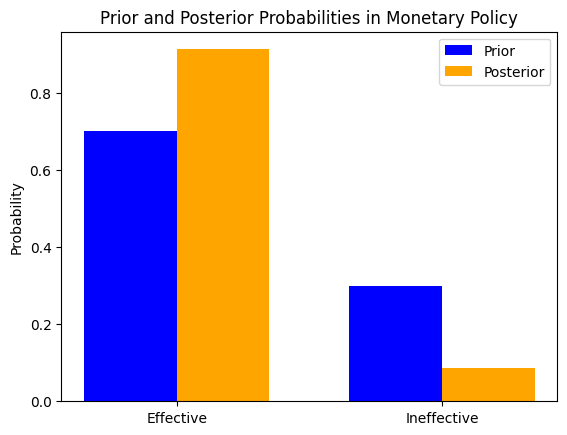

In [ ]:
P_effective = 0.70 
P_ineffective = 1 - P_effective 

P_data_given_effective = 0.90  
P_data_given_ineffective = 0.20  

P_data = (P_data_given_effective * P_effective) + (P_data_given_ineffective * P_ineffective)

P_effective_given_data = (P_data_given_effective * P_effective) / P_data

print(f"Posterior Probability that lowering rates is effective given new data: {P_effective_given_data:.4f}")

labels = ['Prior (Effective)', 'Prior (Ineffective)', 'Posterior (Effective)', 'Posterior (Ineffective)']
prior = [P_effective, P_ineffective]
posterior = [P_effective_given_data, 1 - P_effective_given_data]

x = np.arange(2) 
width = 0.35

fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, prior, width, label='Prior', color='blue')
bars2 = ax.bar(x + width/2, posterior, width, label='Posterior', color='orange')

ax.set_ylabel('Probability')
ax.set_title('Prior and Posterior Probabilities in Monetary Policy')
ax.set_xticks(x)
ax.set_xticklabels(['Effective', 'Ineffective'])
ax.legend()
plt.show()

# Measures of Absolute Risk Aversion

Absolute Risk Aversion (ARA) is a concept in economics that quantifies an individual's aversion to risk. It describes how much a person prefers certain outcomes over uncertain ones. The Arrow-Pratt measure is one of the most widely used metrics for measuring absolute risk aversion.

Arrow-Pratt Measure of Absolute Risk Aversion
The Arrow-Pratt measure of absolute risk aversion is defined mathematically as:

$$A(w) = -\frac{U''(w)}{U'(w)}$$


In [ ]:
def cobb_douglas_utility(x, y, alpha):
    """Cobb-Douglas utility function."""
    return (x ** alpha) * (y ** (1 - alpha))

def arrow_pratt_cobb_douglas(alpha):
    """Calculate the Arrow-Pratt measure of absolute risk aversion for Cobb-Douglas utility."""
    return 1 / (alpha * (1 - alpha))

alpha = float(input("Enter the parameter alpha (0 < alpha < 1) for the Cobb-Douglas utility function: "))

if alpha <= 0 or alpha >= 1:
    raise ValueError("Alpha must be between 0 and 1.")

ara_value = arrow_pratt_cobb_douglas(alpha)

print(f"The Arrow-Pratt measure of absolute risk aversion for Cobb-Douglas utility with alpha = {alpha} is: {ara_value:.4f}")


The Arrow-Pratt measure of absolute risk aversion for Cobb-Douglas utility with alpha = 0.5 is: 4.0000


A higher α leads to lower risk aversion, while a lower α indicates higher risk aversion.

# source:
- Choice under Uncertainty: Problems Solved and Unsolved, Mark J. Machina